In [72]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets   import make_blobs
from sklearn.metrics import accuracy_score
import seaborn as sns 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,cross_val_score,validation_curve,GridSearchCV
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler,RobustScaler
from sklearn.pipeline import make_pipeline

In [17]:
np.random.seed(42)  # Pour la reproductibilité

experience_years = np.random.randint(0, 15, size=1000)  # Expérience entre 0 et 14 ans
projet = np.random.randint(0, 10, size=1000)           # Nombre de projets entre 0 et 9

# Règle simple : embaucher si experience + projet > 12, sinon non
embaucher = np.where(experience_years + projet > 12, 1, 0)

dat = {
    'experience_years': experience_years.tolist(),
    'projet': projet.tolist(),
    'embaucher': embaucher.tolist()
}

# Affichage rapide des 10 premiers exemples
for i in range(10):
    print(f"Exp: {dat['experience_years'][i]}, Projet: {dat['projet'][i]}, Embaucher: {dat['embaucher'][i]}")

Exp: 6, Projet: 0, Embaucher: 0
Exp: 3, Projet: 2, Embaucher: 0
Exp: 12, Projet: 3, Embaucher: 1
Exp: 14, Projet: 0, Embaucher: 1
Exp: 10, Projet: 0, Embaucher: 0
Exp: 7, Projet: 7, Embaucher: 1
Exp: 12, Projet: 1, Embaucher: 1
Exp: 4, Projet: 7, Embaucher: 0
Exp: 6, Projet: 6, Embaucher: 0
Exp: 9, Projet: 9, Embaucher: 1


In [82]:
data = pd.DataFrame(dat)
x= data[['experience_years', 'projet']].values
y = data['embaucher'].values
x.shape, y.reshape(-1, 1).shape
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [19]:
model= KNeighborsClassifier(n_neighbors=2)
model.fit(x_train, y_train)
model.score(x_train, y_train),model.score(x_test, y_test)


(1.0, 1.0)

In [26]:
cross_val_score(model,x_train, y_train, cv=5, scoring='accuracy').mean()

np.float64(0.9949999999999999)

Text(0.5, 0, 'Nombre de voisins (k)')

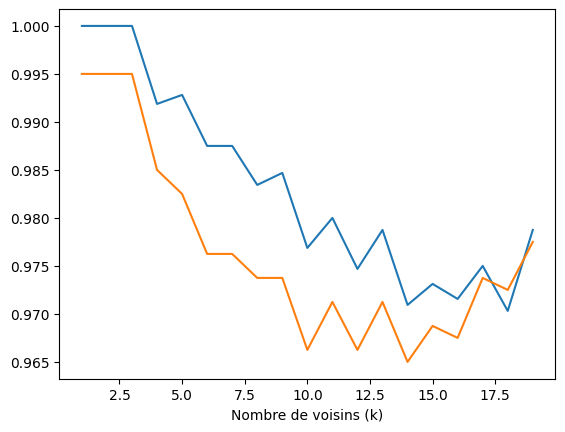

In [30]:
val_train,val_test= validation_curve(model, x_train, y_train, param_name='n_neighbors', param_range=np.arange(1, 20), cv=5, scoring='accuracy')
plt.plot(np.arange(1, 20), val_train.mean(axis=1), label='Train')
plt.plot(np.arange(1, 20), val_test.mean(axis=1), label='Test')
plt.xlabel('Nombre de voisins (k)')

In [10]:
i=np.array([[10, 89]])
y_pred=model.predict(i)
y_pred

array([1])

In [62]:
label=np.array([[2], [3], [4], [5], [6], [7], [8], [9]])
trans=StandardScaler()
trans.fit_transform(label)
trans.transform(np.array([[100]]))

array([[41.24318125]])

In [59]:
trans.transform(np.array([[100]]))
y=x[:, 0]**2 + x[:, 0]+ x[:, 1]**2 + x[:, 1]

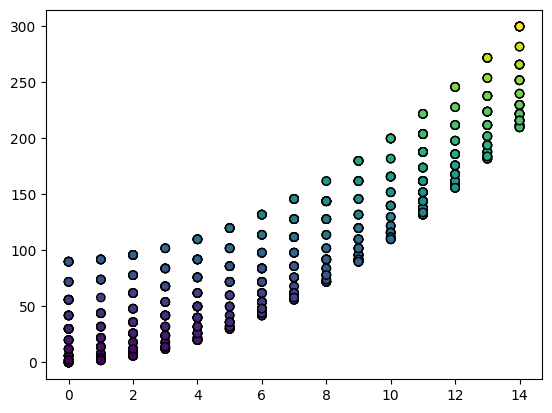

In [ ]:
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='viridis', edgecolor='k')

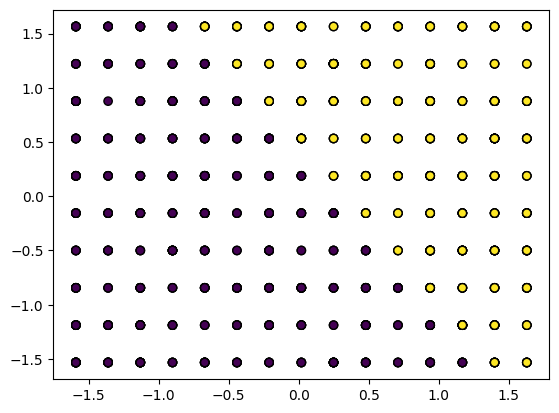

In [56]:
td1=StandardScaler()
td2=StandardScaler()
td1.fit_transform(x[:, 0].reshape(-1, 1))
plt.scatter(td1.fit_transform(x[:, 0].reshape(-1, 1)), td2.fit_transform(x[:, 1].reshape(-1, 1)) ,c=y, cmap='viridis', edgecolor='k')

In [ ]:
mod=make_pipeline(StandardScaler(), KNeighborsClassifier())
mod

,steps,"[('standardscaler', ...), ('kneighborsclassifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30


In [87]:
params = {
	'kneighborsclassifier__n_neighbors': np.arange(1, 20),
	'kneighborsclassifier__weights': ['uniform', 'distance'],
}
gid = GridSearchCV(mod, params, cv=5, scoring='accuracy')
gid.fit(x_train, y_train)
gid.best_params_, gid.best_score_

({'kneighborsclassifier__n_neighbors': np.int64(11),
  'kneighborsclassifier__weights': 'distance'},
 np.float64(1.0))